# Data Analyst Internship Assignment
---

*Author: Sean D Rosario<br\ >Date published: May 07, 2016*

#### This code looks at data sets from the Entrepreneurship 101 MOOC on edX.
<br />
I use insights from the data to answer the following questions:
1.	How many students attempted all the assignments?
2.	How many students received a verified certificate?
3.	Which groups of students tended to complete the assignments and earn a verified certificates?
4.	What should we do to encourage more learners to complete the course and earn a verified certificate?
5.	What data set(s) do you not have that you would like to get to answer the questions above?
---

Importing the relevant packages

In [302]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline
from sklearn import datasets, linear_model
from sklearn.cross_validation import train_test_split

In [303]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
#import StringIO, pydot
#from pydot import graph_from_dot_data
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import confusion_matrix,roc_auc_score
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn import linear_model, svm, datasets
from sklearn.metrics import roc_curve, auc

Importing the data

In [304]:
df1 = pd.read_csv("data set 1.csv")
df2 = pd.read_csv("data set 2.csv")
df3 = pd.read_csv("data set 3.csv")
df4 = pd.read_csv("data set 4.csv")

Previewing the data

In [305]:
df1.head()

,id,language,location,year_of_birth,gender,level_of_education,goals
0,9166517,NaN,NaN,1983,m,b,NaN
1,8887378,NaN,NaN,1991,m,m,Design MOOCS\rFree access to knowledge and inf...
2,8917804,NaN,NaN,1991,f,hs,I'm interested because I am all about improvem...
3,3327768,NaN,NaN,1994,m,hs,To get educated in computer sciences
4,6966768,NaN,NaN,None,NaN,NaN,NaN


In [290]:
df2.head()

,id,grade,HW 01,HW 02,HW 03,HW Avg,Final,Enrollment Track,Verification Status,Certificate Eligible,Certificate Delivered,Certificate Type
0,3550064,0.00,0.0,0.0,0.0,0.0,0.000000,honor,NaN,N,N,NaN
1,4959970,0.72,1.0,1.0,1.0,1.0,0.295455,honor,NaN,Y,Y,honor
2,6112145,0.00,0.0,0.0,0.0,0.0,0.000000,honor,NaN,N,N,NaN
3,239790,0.00,0.0,0.0,0.0,0.0,0.000000,honor,NaN,N,N,NaN
4,6780183,0.00,0.0,0.0,0.0,0.0,0.000000,honor,NaN,N,N,NaN


## 1. How many students attempted all the assignments?


In [139]:
# Assuming that if a student received a scoe of zero on any componenet, he/she did not attempt it
attempted_all = df2[df2["HW 01"]>0][df2["HW 02"]>0][df2["HW 03"]>0][df2["Final"]>0]
print str(len(attempted_all))+ " students have attempted all the assignments"

564 students have attempted all the assignments


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


## 2. How many students received a verified certificate?

In [140]:
df2["Certificate Type"].unique()

array([nan, 'honor', 'verified'], dtype=object)

In [141]:
number  = len(df2[df2["Certificate Type"]=='verified'] [df2["Certificate Eligible"]=='Y'])
print str(number)+" students received a verified certificate"

128 students received a verified certificate


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


## 3. Which groups of students tended to complete the assignments and earn verified certificates?


I consider age groups. There is scope to do analysis on other groups as well.
<br />
<br />
The question I try to answer is:
<br />
**Do learners of a certain age exhibit a willingness to pay for a verified certificate?**<br />(possibly because they have a credit card or more disposable income)

In [166]:
df5 = df1.merge(df2,on="id") # Merged dataset 1 and dataset 2 based on id

In [267]:
ID_passed = df5[df5["Verification Status"]=='ID Verified'][df5["Certificate Eligible"]=="Y"]["year_of_birth"]
honor_passed = df5[df5["Verification Status"]!='ID Verified'][df5["Certificate Eligible"]=="Y"]["year_of_birth"]

ID_failed = df5[df5["Verification Status"]=='ID Verified'][df5["Certificate Eligible"]=="N"]["year_of_birth"]
honor_failed = df5[df5["Verification Status"]!='ID Verified'][df5["Certificate Eligible"]=="N"]["year_of_birth"]



def make_age(list_of_str):
    y1 = []
    for ele in list_of_str:
        try:
            ele = 2016 - int(ele)
            
            # Filtered out ages less than 5 and greater and 100, because I noticed ages above 120
            # which is clearly an error in the data, as the oldest living person is 120!!
            if (ele<5 or ele>100): 
                continue
        except:
            continue
        y1.append(ele)
    return y1

ID_passed = make_int(ID_passed)
honor_passed = make_int(honor_passed)
ID_failed = make_int(ID_failed)
honor_failed = make_int(honor_failed)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


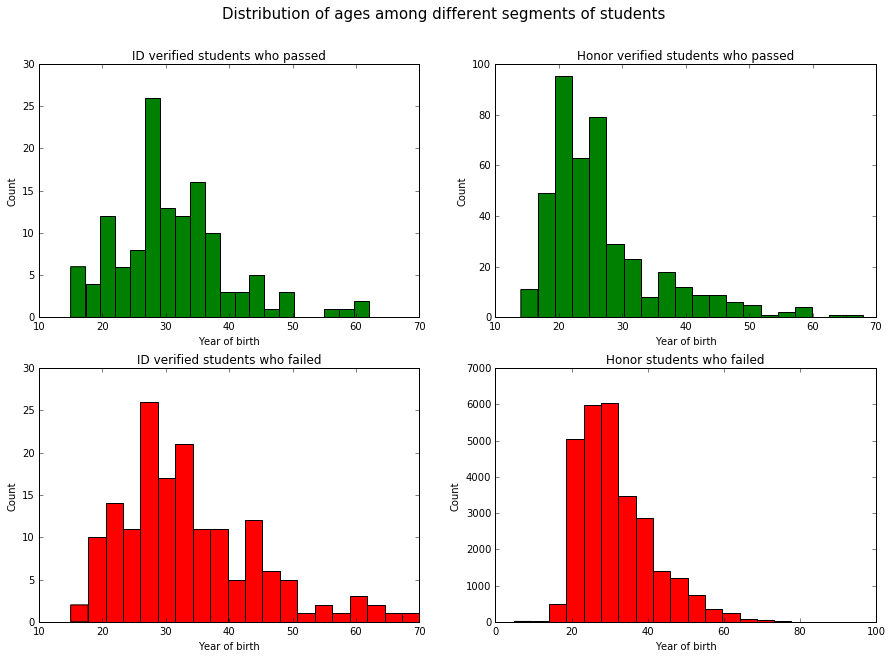

In [277]:
plt.figure(figsize=(15,10))

# the histogram of the data
plt.subplot(221)
plt.hist(ID_passed,20,color="green")
plt.xlabel('Year of birth')
plt.ylabel('Count')
plt.title('ID verified students who passed',fontsize="12")

plt.subplot(222)
plt.hist(honor_passed,20,color="green")
plt.xlabel('Year of birth')
plt.ylabel('Count')
plt.title('Honor verified students who passed',fontsize="12")

# the histogram of the data
plt.subplot(223)
plt.hist(ID_failed,20,color="red")
plt.xlabel('Year of birth')
plt.ylabel('Count')
plt.title('ID verified students who failed',fontsize="12")

plt.subplot(224)
plt.hist(honor_failed,20,color="red")
plt.xlabel('Year of birth')
plt.ylabel('Count')
plt.title('Honor students who failed',fontsize="12")

plt.suptitle("Distribution of ages among different segments of students",fontsize="15")
plt.show()

By visual inspection, students who DO NOT pay for the $99 verified version of the course tend to be younger than ID verified students.

## 4. What should we do to encourage more learners to complete the course and earn a verified certificate?

I try to look at scores on initial homeworks as an indicator that a student might not complete(pass) the class

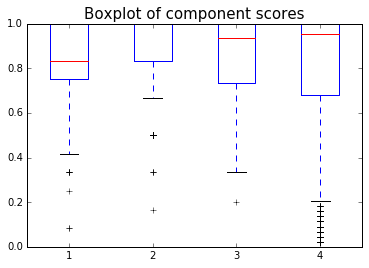

In [319]:

x1 = df2["HW 01"][df2["HW 01"]>0]
x2 = df2["HW 02"][df2["HW 02"]>0]
x3 = df2["HW 03"][df2["HW 03"]>0]
final = df2["Final"][df2["Final"]>0]

plt.boxplot([x1,x2,x3,final])

plt.xticks=["2","3","4","5"]
plt.title("Boxplot of component scores",fontsize="15")
plt.show()

### Looking at the distributions of the HW scores

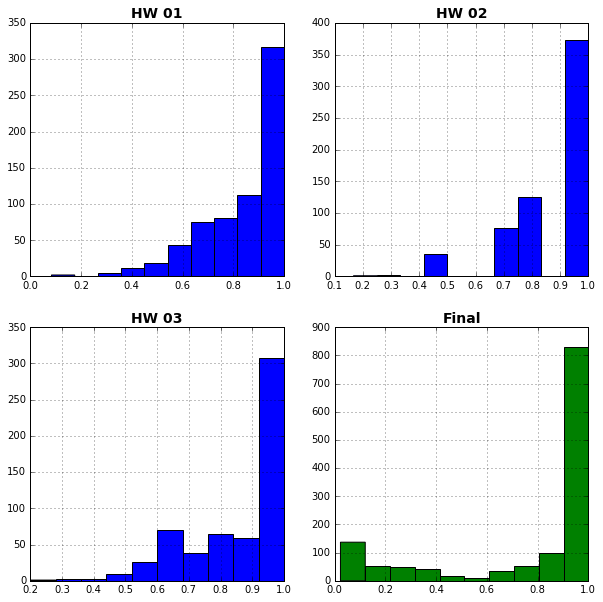

In [143]:
# plot with various axes scales
plt.figure(figsize=(10,10))

# Plotting the distribution of HW 01
plt.subplot(221)
plt.hist(df2["HW 01"][df2["HW 01"]>0])
plt.title("HW 01" ,fontsize=14, fontweight='bold')
plt.grid(True)

# Plotting the distribution of HW 02
plt.subplot(222)
plt.hist(df2["HW 02"][df2["HW 02"]>0])
plt.title('HW 02',fontsize=14, fontweight='bold')
plt.grid(True)

# Plotting the distribution of HW 03
plt.subplot(223)
plt.hist(df2["HW 03"][df2["HW 03"]>0])
plt.title('HW 03',fontsize=14, fontweight='bold')
plt.grid(True)

# Plotting the distribution of HW 04
plt.subplot(224)
plt.hist(df2["Final"][df2["Final"]>0],color="green")
plt.title('Final',fontsize=14, fontweight='bold')
plt.grid(True)

plt.show()

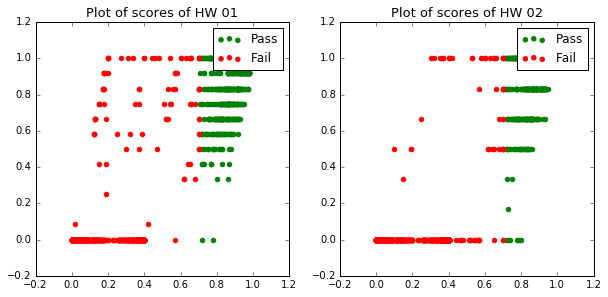

In [311]:
plt.figure(figsize=(10,10))

plt.subplot(221)
plt.scatter(df2["grade"][df2["grade"]>=0.7],df2["HW 01"][df2["grade"]>=0.7],color="green",label = "Pass")
plt.scatter(df2["grade"][df2["grade"]<=0.7],df2["HW 01"][df2["grade"]<=0.7],color="red",label = "Fail")
plt.title("Plot of scores of HW 01",fontsize = 13)
plt.legend()

plt.subplot(222)
plt.scatter(df2["grade"][df2["grade"]>=0.7],df2["HW 02"][df2["grade"]>=0.7],color="green",label = "Pass")
plt.scatter(df2["grade"][df2["grade"]<=0.7],df2["HW 02"][df2["grade"]<=0.7],color="red",label = "Fail")
plt.title("Plot of scores of HW 02",fontsize = 13)
plt.legend()


Students who pass the course in the end, seem to have done well on HW 01 and HW 2

### Let's Reverse engineering the grading system

In [256]:
X = df2[["HW 01","HW 02","HW 03","Final"]]
y = df2["grade"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Code based on the example at: 
# http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X, y)

# The coefficients
print "Coefficients: \n HW 1: {0} \n HW 2: {1} \n HW 3: {2} \n Final: {3}\n".format(float(regr.coef_[0]),float(regr.coef_[1]),float(regr.coef_[2]),float(regr.coef_[3]))
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

Coefficients: 
 HW 1: 0.200475739085 
 HW 2: 0.200365082098 
 HW 3: 0.199515302434 
 Final: 0.39977018449

Residual sum of squares: 0.00
Variance score: 1.00


Therefore the grading goes as follows:

* HW 1 : $20\%$ 
* HW 2 : $20\%$
*  HW 3 : $20\%$
* Final :  $40\%$


### Now I comput the likelihood of Passing based on the score on scores of HW 1 and HW 2
Let us try to model  $ P \ ( \ Grade \geq 0.7 \ | \ HW1 ,\ HW2) $

In [278]:
hw1 = df2["HW 01"]
hw2 = df2["HW 02"]
d = pd.DataFrame({"HW 01": hw1,"HW 02": hw2,'bias': np.ones(len(hw1)), "y": 1.0*(df2["grade"]>=0.7)})   #,"HW 02": hw2,'bias': np.ones(len(hw1))
d= d[d["HW 01"]>0]
d= d.dropna()
#X = pd.DataFrame(data=d)
#y = 1*(df2["grade"]>=0.7)

X = d.drop("y",1)
y = d["y"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

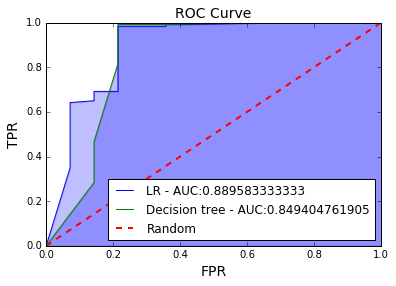

In [281]:
#Logistic Regression
log_regresion = linear_model.LogisticRegression(C=1e30).fit(X_train, y_train)
log_reg_preds_test = log_regresion.predict_proba(X_test)
lr_fpr, lr_tpr, _ = roc_curve(y_test, log_reg_preds_test[:,1])
lr_auc = auc(lr_fpr,lr_tpr)
plt.plot(lr_fpr, lr_tpr, label='LR - AUC:'+str(lr_auc))
plt.fill_between(lr_fpr,lr_tpr, alpha=0.25)

#Decision Tree
decision_tree = DecisionTreeClassifier().fit(X_train, y_train)
dt_preds_test = decision_tree.predict_proba(X_test)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_preds_test[:,1])
dt_auc = auc(dt_fpr,dt_tpr)
plt.plot(dt_fpr, dt_tpr, label='Decision tree - AUC:'+str(dt_auc))
plt.fill_between(dt_fpr,dt_tpr, alpha=0.25)


#Printing the random line
x = [0.0, 1.0]
plt.plot(x, x, linestyle='dashed', color='red', linewidth=2, label='Random')

plt.xlabel("FPR", fontsize=14)
plt.ylabel("TPR", fontsize=14)
plt.title("ROC Curve", fontsize=14)
plt.legend(loc=4)
plt.show()

Note:
- Random guessing would give us an AUC of 0.5
- **High AUCs imply that the two models perform much better than random guessing**


In [287]:
tot = float(len(y_test))
count =0.0
for i,j in zip(log_regresion.predict(X_test),y_test):
    if i==j:
        count +=1

print "Accuracy using logisitic regression is ", count/tot *100

tot = float(len(y_test))
count =0.0
for i,j in zip(decision_tree.predict(X_test),y_test):
    if i==j:
        count +=1

print "Accuracy using logisitic regression is ", count/tot *100

Accuracy using logisitic regression is  95.5223880597
Accuracy using logisitic regression is  97.0149253731


** Thus, we can predict with a high accuracy, whether or not a student would pass the course given his/her scores on the first two homeworks**

Possible actions on this insight:
- Email the students who have a low probability of completing the course, with positive encouragement - maybe reminding them of the benefits of 

## 5. What data set(s) do you not have that you would like to get to answer the questions above?


Another dataset that could provide a lot more information is: student's interaction with the website such as: clicks, scrolls, mouse activity, etc could be logged. This raw data could be mined and interesting insights and pattern can be discovered.

#### Examples of what could be mined:
- What questions students are spending more time on
- Which lecture videos students pause or skip more than others
- How often a student watches lectures or does quizzes

These sort of inquires can help the course content creators understand what the student preferences are and what they struggle with